# Введение в аналитику данных: домашнее задание 2

В этом домашнем задании мы будем проверять гипотезы. Во всех задачах подробно обосновывайте выбор критерия для проверки гипотезы и делайте выводы (можно пользоваться учебниками и генеративными моделями - но пропускайте подсказки ассистентов через голову).

У вас будет 4 задания - каждое весит 2.5 балла из 10, суммарно за домашнее задание можно набрать 10 баллов.

Оцениваются:

* корректность полученных результатов
* подробность обоснования выбора статистических тестов и выводы

Ответы записывайте внутри вашего рабочего google colab, а также (подробно текстом) дублируйте [в форму](https://docs.google.com/forms/d/e/1FAIpQLSfddNy4g88YHPA4fux1TLYaweFf4SWPiU0loeuwCYID7eiW4w/viewform?usp=sf_link).

In [1]:
import numpy as np
import pandas as pd

from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

## Задание 1 (рейтинги президентов)

В таблице `presidents.csv` представлены рейтинги различных президентов США (интересно, почему не российских). Социальные опросы проводились раз в квартал. Опрашивалась случайная выборка граждан. У каждого спрашивалось одобряет ли он деятельность президента.

Ричард Никсон был президентом США с 20 января 1969 года по 9 августа 1974 года. 17 июня 1972 года произошёл Уотергейтский скандал. Давайте проанализируем, что при этом произошло с его рейтингом.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/presidents.csv')
df.head()

,year,Qtr1,Qtr2,Qtr3,Qtr4
0,1945,NaN,87,82.0,75.0
1,1946,63.0,50,43.0,32.0
2,1947,35.0,60,54.0,55.0
3,1948,36.0,39,NaN,NaN
4,1949,69.0,57,57.0,51.0


In [ ]:
df

,year,Qtr1,Qtr2,Qtr3,Qtr4
0,1945,NaN,87,82.0,75.0
1,1946,63.0,50,43.0,32.0
2,1947,35.0,60,54.0,55.0
3,1948,36.0,39,NaN,NaN
4,1949,69.0,57,57.0,51.0
5,1950,45.0,37,46.0,39.0
6,1951,36.0,24,32.0,23.0
7,1952,25.0,32,NaN,32.0
8,1953,59.0,74,75.0,60.0
9,1954,71.0,61,71.0,57.0


Чтобы привести таблицу к удобному виду используйте функцию `pd.melt`. Вытащите из таблички рейтинг Никсона с 1 квартала 1969 года по 2 квартал 1972 года (включая его). Запишите эти данные в переменную `x`. Рейтинг с 3 квартала 1972 года по 2 квартал 1974 года поместите в переменную `y`. Пропуски в данных удалите из выборки.

In [3]:
x = pd.melt(df[(1969 <= df['year']) & (df['year'] <= 1972)], id_vars=['year']).dropna()
y = pd.melt(df[1973 <= df['year']], id_vars=['year'])
x = x['value'].values
y = y[(y['year'] != 1974) | (y['variable'] == 'Qtr1') | (y['variable'] == 'Qtr2')]
y = y['value'].values
x, y

(array([59., 66., 51., 49., 65., 53., 48., 61., 65., 61., 54., 56., 52.,
        49.]),
 array([68., 28., 44., 25., 40., 27.]))

In [ ]:
x.mean(), y.mean()

(56.357142857142854, 38.666666666666664)

Правда ли, что после скандала средний рейтинг Никсона рухнул? Предполагайте, что рейтинг распределён нормально, а также, что дисперсия рейтинга не изменилась из-за скандала. Наблюдаемое значение статистики запишите в переменную `obs`, в переменную `pval` запишите $p$-значение.

In [8]:
# H0: рейтинг не изменился. H1: рейтинг упал.
from statsmodels.stats.weightstats import ttest_ind

t_stat, p_value, df = ttest_ind(x, y, alternative='larger', usevar='pooled')
print("T-статистика:", t_stat)
print("P-значение:", p_value)
print('Degrees of Freedom:', df)

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: рейтинг рухнул")
else:
    print("Нет оснований отвергать нулевую гипотезу. Нет оснований считать, что рейтинг рухнул")

obs = t_stat
pval = p_value

T-статистика: 3.5640741313229793
P-значение: 0.0011087344846424454
Degrees of Freedom: 18.0
Отвергаем нулевую гипотезу: рейтинг рухнул


In [9]:
# небольшая самопроверка
assert np.abs(obs - 3.5640741313229793) < 1e-5

**Почему вы выбрали именно этот критерий для проверки гипотезы? Какие выводы вы сделали?**

**Ответ (продублируйте в гугл-форму):**

Выбор: T-тест подходит для сравнения средних в двух группах с нормальным распределением и неизвестной дисперсией.

Выводы: P-значение менее 5% -> отвергнуть гипотезу о неизменности рейтинга -> рейтинг упал.

Снова президентом Никсон станет в $3000$ году.

![](https://vignette.wikia.nocookie.net/futurama/images/2/2f/Richard_M._Nixon%27s_head.jpg/revision/latest/scale-to-width-down/250?cb=20131123190522&path-prefix=ru)

## Задание 2 (доктор сон)

Проводится эксперимент о пользе нового снотворного. Для его проведения используется группа из $10$ студентов. В первый день каждый из них ложится спать. На утро измеряется, сколько он проспал. Из результата вычитают $8$ (нормальное число часов сна). На второй день каждому дают таблетку. Утром снова измеряют, сколько человек проспал, и вычитают $8$. Результаты эксперимента записаны в табличку `sleep.csv`.

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/sleep.csv')
df.head()

,extra,group,ID
0,0.7,1,1
1,-1.6,1,2
2,-0.2,1,3
3,-1.2,1,4
4,-0.1,1,5


In [11]:
df

,extra,group,ID
0,0.7,1,1
1,-1.6,1,2
2,-0.2,1,3
3,-1.2,1,4
4,-0.1,1,5
5,3.4,1,6
6,3.7,1,7
7,0.8,1,8
8,0.0,1,9
9,2.0,1,10


In [24]:
df = df[df['group'] == 1].set_index('ID').join(df[df['group'] == 2].set_index('ID'), lsuffix='_before', rsuffix='_after')
df

,extra_before,group_before,extra_after,group_after
ID,,,,
1,0.7,1,1.9,2
2,-1.6,1,0.8,2
3,-0.2,1,1.1,2
4,-1.2,1,0.1,2
5,-0.1,1,-0.1,2
6,3.4,1,4.4,2
7,3.7,1,5.5,2
8,0.8,1,1.6,2
9,0.0,1,4.6,2


In [27]:
df = df[['extra_before', 'extra_after']]
df

,extra_before,extra_after
ID,,
1,0.7,1.9
2,-1.6,0.8
3,-0.2,1.1
4,-1.2,0.1
5,-0.1,-0.1
6,3.4,4.4
7,3.7,5.5
8,0.8,1.6
9,0.0,4.6


Правда ли, что сон студентов до приёма снотворного не отличается от нормы (отклонение от 8 часов равно нулю). Проверьте эту гипотезу на $5\%$ уровне значимости, в переменную `pval1` запишите p-значение.

In [29]:
x = df['extra_before'].values
x, x.mean()

(array([ 0.7, -1.6, -0.2, -1.2, -0.1,  3.4,  3.7,  0.8,  0. ,  2. ]), 0.75)

In [74]:
# H0: сон студентов нормальный. H1: сон студентов не нормальный.
from scipy.stats import ttest_1samp

t_stat, p_value = ttest_1samp(x, alternative='two-sided', popmean=0)
print("T-статистика:", t_stat)
print("P-значение:", p_value)

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: сон студентов до приёма снотворного отличается от нормы")
else:
    print("Нет оснований отвергать нулевую гипотезу: сон студентов до приёма снотворного не отличается от нормы")

tobs1 = t_stat
pval1 = p_value

T-статистика: 1.3257101407138212
P-значение: 0.2175977800684489
Нет оснований отвергать нулевую гипотезу: сон студентов до приёма снотворного не отличается от нормы


In [56]:
# from scipy.stats import wilcoxon

# stat, p_value = wilcoxon(x, alternative='two-sided')
# print("Статистика:", stat)
# print("P-значение:", p_value)

# if p_value < 0.05:
#     print("Отвергаем нулевую гипотезу: сон студентов до приёма снотворного отличается от нормы")
# else:
#     print("Нет оснований отвергать нулевую гипотезу: сон студентов до приёма снотворного не отличается от нормы")

Статистика: 14.0
P-значение: 0.3139380937749148
Нет оснований отвергать нулевую гипотезу: сон студентов до приёма снотворного не отличается от нормы


Правда ли, что благодаря таблеткам студенты стали спать больше (односторонняя альтернатива)? Запишите в переменную `pval2` соотвествующее p-значение.

In [32]:
y = (df['extra_after'] - df['extra_before']).values
y, y.mean()

(array([1.2, 2.4, 1.3, 1.3, 0. , 1. , 1.8, 0.8, 4.6, 1.4]), 1.58)

In [75]:
# H0: сон студентов не изменился. H1: сон студентов улучшился.
from scipy.stats import ttest_1samp

t_stat, p_value = ttest_1samp(y, alternative='greater', popmean=0)
print("T-статистика:", t_stat)
print("P-значение:", p_value)

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: благодаря таблеткам студенты стали спать больше")
else:
    print("Нет оснований отвергать нулевую гипотезу: благодаря таблеткам студенты не стали спать больше")

tobs2 = t_stat
pval2 = p_value

T-статистика: 4.062127683382037
P-значение: 0.001416445098692135
Отвергаем нулевую гипотезу: благодаря таблеткам студенты стали спать больше


In [80]:
# from scipy.stats import wilcoxon

# stat, p_value = wilcoxon(y, alternative='greater')
# print("Статистика:", stat)
# print("P-значение:", p_value)

# if p_value < 0.05:
#     print("Отвергаем нулевую гипотезу: благодаря таблеткам студенты стали спать больше")
# else:
#     print("Нет оснований отвергать нулевую гипотезу: благодаря таблеткам студенты не стали спать больше")

Статистика: 45.0
P-значение: 0.003816220824102754
Отвергаем нулевую гипотезу: благодаря таблеткам студенты стали спать больше


In [69]:
# самопроверка
assert np.abs(tobs1 - 1.325710) < 1e-5
assert np.abs(tobs2 - 4.062127) < 1e-5

**Почему вы выбрали именно этот критерий для проверки гипотезы? Какие выводы вы сделали?**

**Ответ (продублируйте в гугл-форму):**

Выбор: T-тест подходит для сравнения среднего в группе с нормальным распределением и константы (во второй подзадаче выборка - это попарные разности соответствующих элементов из двух данных выборок). Мы можем использовать этот тест, если предположить, что распределение нормальное. Так же можно использовать тест Вилкоксона, который не требует нормального распределения. Тест Вилкоксона даёт те же результаты.

Выводы: сон студентов до приёма снотворного не отличается от нормы (P-значение более 5%); благодаря таблеткам студенты стали спать больше (P-значение менее 5%).

## Задание 3 (мыши и зеркало)

$16$ лабораторных мышей были помещены в двухкомнатные клетки, в одной из комнат висело зеркало. С целью установить, есть ли у мышей какие-то предпочтения насчет зеркал, измерялась доля времени, которое каждая мышь проводила в каждой из своих двух клеток.

![](https://ars.els-cdn.com/content/image/1-s2.0-S0168159104000061-gr1.gif)

В файле `mouses_mirror.txt` лежит информация о том, какую долю времени мышка проводила в клетке с зеркалом.

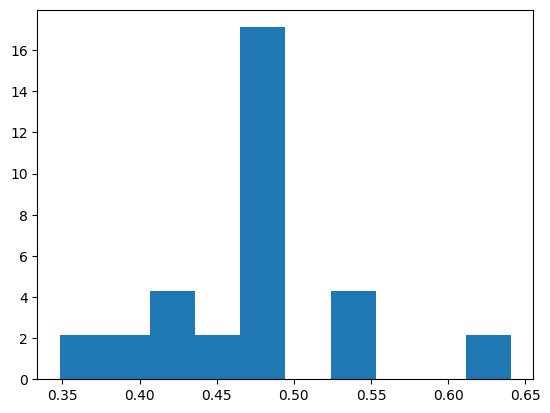

In [76]:
x = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/mouses_mirror.txt', header = None)[0].values
plt.hist(x, density=True);

Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью критерия знаков. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия. Запишите в переменную `pvalue_1` получившееся в результате этого $p$-значение.

In [88]:
# H0: мышам безразлично в какой комнате проводить время (доля времени проведённая в комнате с зеркалом == 0.5).
# H1: мышам не безразлично в какой комнате проводить время (доля времени проведённая в комнате с зеркалом != 0.5).
from statsmodels.stats.descriptivestats import sign_test

stat, p_value = sign_test(x, mu0=0.5)
print("Статистика:", stat)
print("P-значение:", p_value)

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: мышам не безразлично в какой комнате проводить время")
else:
    print("Нет оснований отвергать нулевую гипотезу: мышам безразлично в какой комнате проводить время")

pvalue_1 = p_value
# Основные особенности: непараметрический, нечувствителен к сильным отличиям от среднего (фиксирует только знак отличия).

Статистика: -5.0
P-значение: 0.021270751953125
Отвергаем нулевую гипотезу: мышам не безразлично в какой комнате проводить время


Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью теста Вилкоксона. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_2` получившееся в результате этого $p$-значение.

In [83]:
# H0: мышам безразлично в какой комнате проводить время (доля времени проведённая в комнате с зеркалом == 0.5).
# H1: мышам не безразлично в какой комнате проводить время (доля времени проведённая в комнате с зеркалом != 0.5).
from scipy.stats import wilcoxon

stat, p_value = wilcoxon(x - 0.5, alternative='two-sided')
print("Статистика:", stat)
print("P-значение:", p_value)

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: мышам не безразлично в какой комнате проводить время")
else:
    print("Нет оснований отвергать нулевую гипотезу: мышам безразлично в какой комнате проводить время")

pvalue_2 = p_value
# Основные особенности: непараметрический, использует ранги абсолютных значений и из-за этого слабо чувствителен к сильным отличиям от среднего.

Статистика: 35.0
P-значение: 0.09344482421875
Нет оснований отвергать нулевую гипотезу: мышам безразлично в какой комнате проводить время


Проверьте гипотезу о том, что мышкам безразлично в какой комнате проводить время с помощью асимптотического $z$-теста. Сформулируйте нулевую гипотезу, перечислите основные особенности этого критерия.  Запишите в переменную `pvalue_3` получившееся в результате этого $p$-значение.

In [86]:
# H0: мышам безразлично в какой комнате проводить время (доля времени проведённая в комнате с зеркалом == 0.5).
# H1: мышам не безразлично в какой комнате проводить время (доля времени проведённая в комнате с зеркалом != 0.5).
from statsmodels.stats.weightstats import ztest, zconfint

stat, p_value = ztest(x, alternative='two-sided', value=0.5)
print("Z-статистика:", stat)
print("P-значение:", p_value)

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: мышам не безразлично в какой комнате проводить время")
else:
    print("Нет оснований отвергать нулевую гипотезу: мышам безразлично в какой комнате проводить время")

pvalue_3 = p_value
# Основные особенности: требует нормальное распределение и известную дисперсию (либо много данных, которых у нас нет).

Z-статистика: -1.4961782502486842
P-значение: 0.13460721078205806
Нет оснований отвергать нулевую гипотезу: мышам безразлично в какой комнате проводить время


In [ ]:
# проверка того, что задание решено верно
assert pvalue_1 < 0.05
assert pvalue_2 > 0.05
assert pvalue_3 > 0.05

Объясните, почему `pvalue` от теста к тесту ведёт себя именно так. Подробнее про опыт с мышками читайте [в оригинальном исследовании.](https://www.sciencedirect.com/science/article/abs/pii/S0168159104000061)

__Ответ (продублируйте в гугл-форму):__

Ответ: как видно из гистограммы, в выборке присутствует множество элементов, совсем немного меньших, чем 0.5. Критерий знаков не различает на сколько далеко элементы лежат от предполагаемого среднего значения и потому считает это множество элементов между 0.45 и 0.50 более значимым, чем оно есть и, соответственно, выдаёт маленькое P-значение. Теста Вилкоксона опирается на ранги, которые тоже не до конца отражают разницу между величинами, а только показывают их порядок. Он тоже придаёт множеству элементов между 0.45 и 0.50 повышенное значение, но не так сильно, как критерий знаков, поэтому он выдаёт большее P-значение, чем критерий знаков, но меньшее, чем Z-тест, у которого данное смещение перспективы отсутствует совсем.

## Задание 4 (транзакции клиентов)

Для увеличения конверсии мы хотим переименовать кнопку "Subscribe now!" на сайте в "Keep me updated".

Данные о результатах A/B-теста находятся в таблице `a_b_test`. В колонке `transaction` для каждого клиента указано, кликнул он по кнопке или нет.

Оцените эффект от изменения названия кнопки.



In [90]:
a_b_test = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/ClientsTransactions.csv")

a_b_test.head()

,group,transaction
0,B,0
1,B,0
2,A,0
3,B,0
4,A,0


In [92]:
a_b_test.shape

(4398, 2)

Создайте summary_table. Код должен иметь структуру (названия колонок, строк и их количество) как на таблице со скриншота.

In [104]:
summary_table = a_b_test.groupby('group').count().join(a_b_test.groupby('group').sum(), lsuffix='_count')
summary_table = summary_table.rename(columns={"transaction_count": "group"})
summary_table['conversion_rate'] = summary_table['transaction'] / summary_table['group']
summary_table

,group,transaction,conversion_rate
group,,,
A,2060,56,0.027184
B,2338,74,0.031651


Отфильтруйте исходную таблицу, оставив в ней только клиентов группы А - результат назовите A_group. Создайте аналогичный объект B_group по группе B.

Нарисуйте гистограмму, отображающую на одном рисунке количество успешных транзакций (кликов по кнопке) для каждой группы.

In [108]:
A_group = a_b_test[a_b_test['group'] == 'A']
B_group = a_b_test[a_b_test['group'] == 'B']
A_group.shape, B_group.shape

((2060, 2), (2338, 2))

<ipython-input-135-dabc426333fe>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Group A', 'Group B'], y='transaction', data = summary_table, palette='summer')


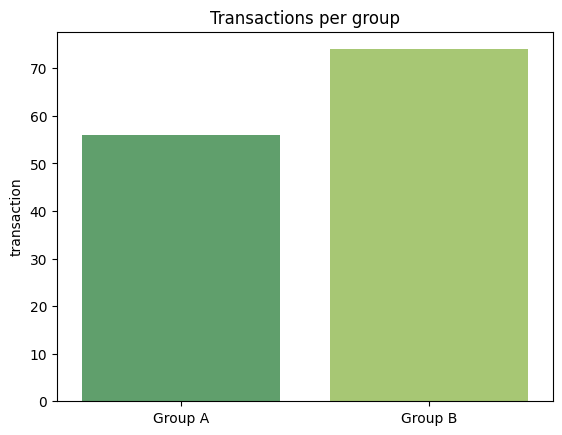

In [135]:
sns.barplot(x=['Group A', 'Group B'], y='transaction', data = summary_table, palette='summer')
plt.title('Transactions per group')
plt.show()

Проведите статистический тест для сравнения эффекта от изменения названия кнопки. Сначала сформулируйте гипотезу, затем выберите тест и фиксируйте уровень значимости 0.05. Выберите подходящий тест и объясните его выбор. Проверьте гипотезу и сделайте выводы.

__Выводы (продублируйте в гугл-форму):__


In [123]:
# H0: переименование кнопки не изменяет conversion rate.
# H1: переименование кнопки увеличивает conversion rate.
from statsmodels.stats.proportion import proportions_ztest

count = np.array([summary_table.loc['A', 'transaction'], summary_table.loc['B', 'transaction']])
nobs = np.array([summary_table.loc['A', 'group'], summary_table.loc['B', 'group']])

z_stat, p_value = proportions_ztest(count, nobs, alternative='smaller')
print("Z-статистика:", z_stat)
print("P-значение:", p_value)

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: переименование кнопки увеличивает conversion rate.")
else:
    print("Нет оснований отвергать нулевую гипотезу: переименование кнопки не изменяет conversion rate.")

pvalue_3 = p_value
# Основные особенности: требует нормальное распределение и известную дисперсию (либо много данных, которых у нас нет).

Z-статистика: -0.8727073961398345
P-значение: 0.19141129265763335
Нет оснований отвергать нулевую гипотезу: переименование кнопки не изменяет conversion rate.


Выбор: для сравнения пропорций при наличии больших выборок (по закону больших чисел, можно считать распределение нормальным) подходит z-тест для пропорций.

Выводы: P-значение более 5% -> Нет оснований отвергать гипотезу о неизменности conversion rate.